# HexagDLy 2D example

This notebook illustrates the basic usage and functionalities provided by HexagDLy. Utilities are provided to create hexagonally sampled toy data and visualise tensors in their original hexagonal layout.

In [1]:
import hexagdly
from hexagdly_tools import plot_hextensor
from example_utils import toy_data, toy_dataset, model
import torch

/home/tim/anaconda3/envs/pt-04/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


To start, a hexagonal example image is created and plotted with the provided methods. A `toy_data` object is a hexagonal array of given size where hexagonal shapes are positioned at given or random coordinates. The implemented shapes to choose from are are:

**['small_hexagon', 'medium_hexagon', 'snowflake_1', 'snowflake_2', 'snowflake_3', 'flower', 'double_hex']**

For this example, different shapes are centered on odd and even columns of an array:

<IPython.core.display.Javascript object>


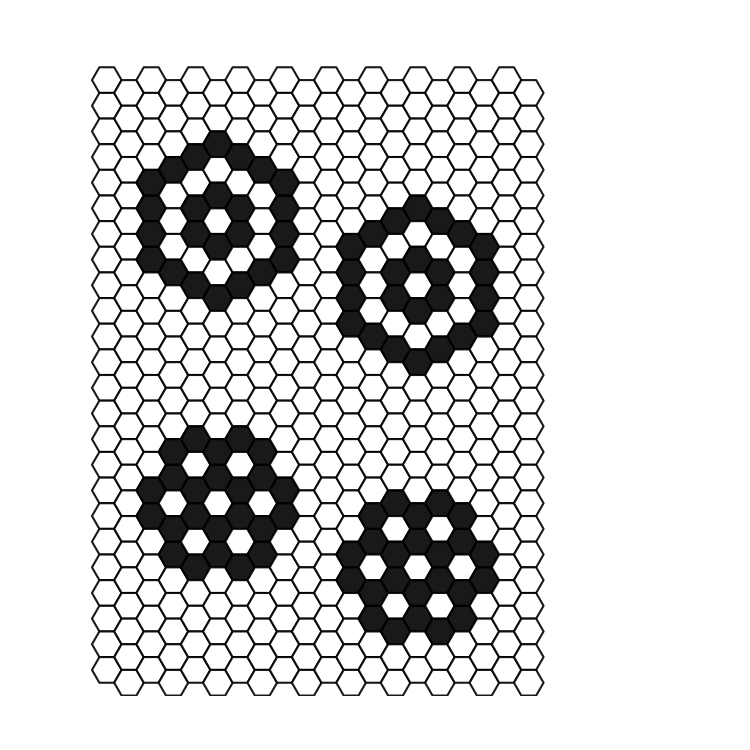

In [2]:
%matplotlib notebook

# Tensor parameters:
batch_size = 1
channels = 1
num_rows = 20
num_columns = 24

# Shapes in tensor with position (px, py)
s1 = toy_data('double_hex', num_rows, num_columns, channels, batch_size, px=5, py=5)
t1 = s1.to_torch_tensor()
s2 = toy_data('double_hex', num_rows, num_columns, channels, batch_size, px=14, py=8)
t2 = s2.to_torch_tensor()

s3 = toy_data('snowflake_3', num_rows, num_columns, channels, batch_size, px=5, py=16)
t3 = s3.to_torch_tensor()
s4 = toy_data('snowflake_3', num_rows, num_columns, channels, batch_size, px=14, py=19)
t4 = s4.to_torch_tensor()

tensor = t1 + t2 + t3 + t4 

plot_hextensor(tensor, figname='tensor')

The API to perform a hexagonal convolution is very similar to the one provided by PyTorch. First, an instance of the `hexagdly.Conv2d` class is created with a given number of input and output channels as well as kernel size and stride which defines the whole operation. In HexagDLy, the operation has a debug parameter which, if set to `True`, sets all kernel elements to 1.

In [3]:
hex_conv = hexagdly.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1, stride = 1, bias=False, debug=True)

To apply the now defined operation to a tensor, the input is simply passed to the created instance. 
It can be seen in the output that the operation conserves the symmetry of the hexagonal grid and the response shows translational invariance.

Input dimensions:  torch.Size([1, 1, 24, 20])
Output dimensions:  torch.Size([1, 1, 24, 20])


<IPython.core.display.Javascript object>


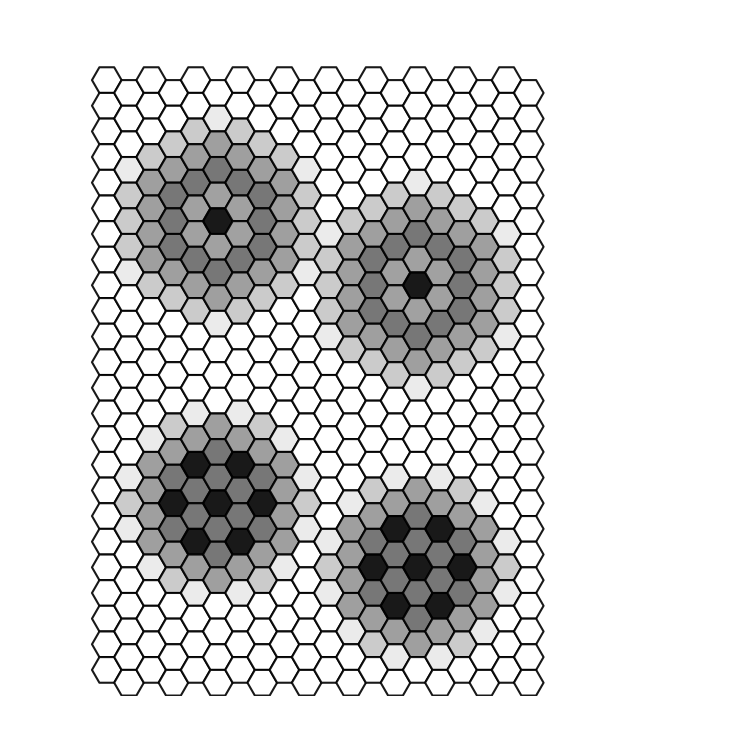

In [4]:
hex_conved_tensor = hex_conv(tensor)
print('Input dimensions: ',tensor.size())
print('Output dimensions: ',hex_conved_tensor.size())
plot_hextensor(hex_conved_tensor, figname='hex_conved_tensor')

This is not the case for a standard convolution with a square kernel in PyTorch e.g. with a size of $3 \times 3$. For this one layer of zeros has to be padded and the elements of the kernel have to be set to 1. The difference in the result is obvious:

<IPython.core.display.Javascript object>


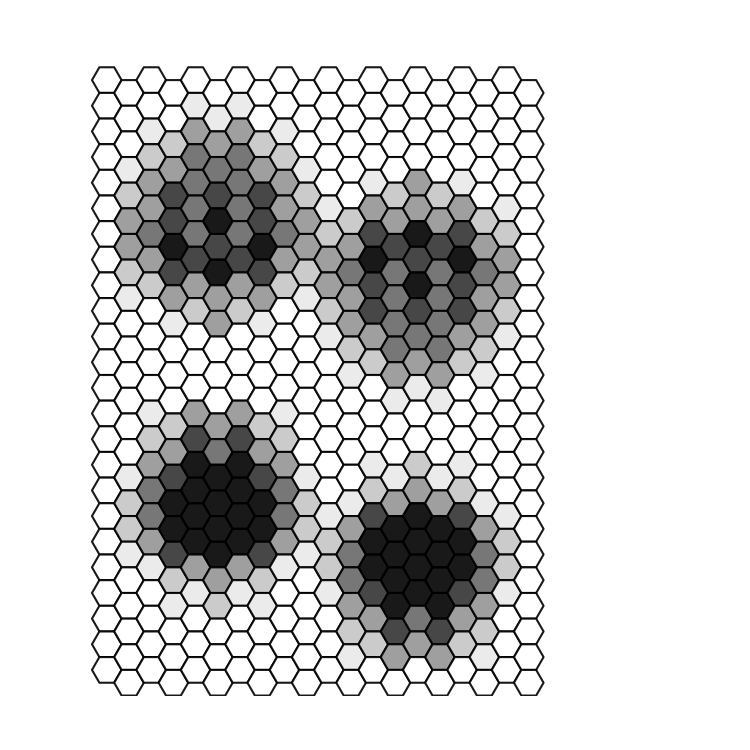

In [5]:
import torch.nn as nn
square_conv = nn.Conv2d(1, 1, 3, 1, 1, bias=False)
square_conv.weight.data = torch.ones([1,1,3,3])
square_conved_tensor = square_conv(tensor)
plot_hextensor(square_conved_tensor, figname='square_conved_tensor')

It can be seen that a square kernel destroys the symmetry of the shapes and gives different results for objects being centetred on odd and on even columns. This is due to the shift between columns of pixels in the addressing scheme that is required by HexagDLy.